In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, multilabel_confusion_matrix, classification_report, plot_roc_curve, roc_auc_score, accuracy_score, roc_curve, auc, f1_score, confusion_matrix, recall_score, plot_confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#Methods
SIGNS = ['afternoon', 'baby', 'big', 'born', 'bye', 'calendar',
'child', 'cloud', 'come', 'daily', 'dance', 'dark',
'day', 'enjoy', 'go', 'hello', 'home', 'love',
'my', 'name', 'no', 'rain', 'sorry', 'strong',
'study', 'thankyou', 'welcome', 'wind', 'yes', 'you'] 

def plot_cnf_matrix(cm, name, cmap=None, normalize=False): 
    
    fnt_sz = 12
    target_names = SIGNS 
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(14, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix ' + name, fontsize =fnt_sz+3)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=65, fontsize= fnt_sz)
        plt.yticks(tick_marks, target_names, fontsize=fnt_sz)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize = fnt_sz)
    plt.xlabel('Predicted Labels\nAccuracy={:0.4f}; Misclassified={:0.4f}'.format(accuracy, misclass), fontsize=fnt_sz+1)
    plt.show()  
    
def plot_performance_results(model, name, y_pred, y_test, x_train, x_test, pred_proba = None):
    
    acc = accuracy_score(y_test, y_pred)
    print(name)
    print('Accuracy: {}'.format(round(acc, 4)))
    prf_macro =precision_recall_fscore_support(y_test, y_pred, average='macro')
    print('Macro Precision: {}'.format(round(prf_macro[0],4)))
    print('Macro Recall: {}'.format(round(prf_macro[1],4)))
    print('Macro F Score: {}'.format(round(prf_macro[2],4)))
    print('\n')
    print('Confusion Matrix {}:'.format(name))
    plot_cnf_matrix(confusion_matrix(y_test, y_pred), name)

In [4]:
train = pd.read_csv('ADM/train-final_imputation.csv', header=None)
test = pd.read_csv('ADM/test-final_imputation.csv', header=None)

In [5]:
train 

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
0,-0.479730,0.726079,2.403713,-0.481913,0.540689,2.455865,-0.646274,0.406351,2.428461,-0.312905,...,0.422235,0.730551,0.367526,0.520040,0.493564,0.485049,0.477886,0.607874,0.441320,5
1,0.051888,0.646871,2.409750,0.060117,0.451912,2.449198,-0.106647,0.344324,2.461468,0.183852,...,0.365385,0.428723,0.571661,0.431776,0.279627,0.595978,0.389501,0.241849,0.617291,30
2,-0.002692,0.624926,2.240212,0.018586,0.435987,2.269613,-0.152985,0.336314,2.305371,0.164105,...,0.449078,0.537268,0.488480,0.540547,0.542650,0.430114,0.542999,0.454954,0.479623,26
3,-0.029336,0.664426,2.443440,-0.023426,0.480809,2.451577,-0.203417,0.353489,2.506273,0.119183,...,0.420331,0.713397,0.387092,0.439498,0.417769,0.554555,0.498407,0.565789,0.455313,20
4,0.065604,0.639172,2.377587,0.069247,0.447377,2.405972,-0.092707,0.339007,2.368022,0.231172,...,0.280299,0.671461,0.475014,0.401192,0.372539,0.578720,0.446630,0.580236,0.460550,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,-0.153429,0.653027,2.290336,-0.202696,0.460290,2.337915,-0.285067,0.331688,2.247679,-0.060992,...,0.417537,0.485318,0.522038,0.435164,0.464692,0.536148,0.538248,0.338490,0.536627,15
536,-0.270779,0.692372,2.418405,-0.309432,0.513018,2.427828,-0.367138,0.339803,2.340697,-0.174124,...,0.266861,0.787530,0.375785,0.490460,0.512968,0.463116,0.507656,0.280617,0.563687,17
537,-0.293375,0.679736,2.413071,-0.332449,0.499503,2.442463,-0.395068,0.346635,2.347341,-0.197936,...,0.384722,0.575436,0.505751,0.331261,0.389225,0.598488,0.617464,0.316425,0.504178,22
538,-0.497183,0.534425,2.322565,-0.557379,0.353817,2.343797,-0.614599,0.217394,2.218595,-0.435612,...,0.398216,0.759135,0.345677,0.341312,0.408758,0.589787,0.561659,0.399114,0.504443,19


In [6]:
test

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
0,-0.332255,0.672471,2.450465,-0.323645,0.486062,2.526748,-0.483695,0.370296,2.534973,-0.172186,...,0.426959,0.604953,0.464157,0.751404,0.467516,0.306133,0.521694,0.546094,0.439480,28
1,-0.089784,0.656778,2.431880,-0.079363,0.467939,2.429239,-0.193909,0.349866,2.329680,0.081013,...,0.456633,0.596048,0.461552,0.557319,0.373754,0.515013,0.413323,0.491261,0.530069,13
2,-0.427810,0.699557,2.347763,-0.444873,0.530140,2.433568,-0.610365,0.402565,2.398841,-0.264254,...,0.412314,0.777705,0.318174,0.532617,0.476989,0.487606,0.604556,0.489667,0.433812,1
3,-0.089790,0.694279,2.428455,-0.072881,0.520537,2.496676,-0.255747,0.404209,2.520148,0.115363,...,0.328799,0.551472,0.498960,0.313094,0.450005,0.581886,0.409794,0.377352,0.578679,1
4,-0.387741,0.540410,2.399926,-0.406310,0.361768,2.459448,-0.576004,0.262814,2.457772,-0.256852,...,0.311284,0.684091,0.457543,0.446787,0.499285,0.512345,0.366741,0.468337,0.526775,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.120557,0.620886,2.150460,0.111768,0.448294,2.159698,0.021771,0.297987,2.067995,0.297496,...,0.546645,0.492502,0.471850,0.514066,0.456260,0.493552,0.644065,0.331046,0.482527,8
536,-0.286926,0.673395,2.408284,-0.324050,0.481795,2.461855,-0.435962,0.337695,2.390008,-0.156024,...,0.346754,0.605193,0.495232,0.415223,0.503587,0.523376,0.540546,0.296970,0.549112,30
537,-0.067440,0.693735,2.366096,-0.099248,0.506985,2.401881,-0.212673,0.369984,2.308468,0.070817,...,0.420935,0.602493,0.465757,0.561188,0.402575,0.474175,0.498675,0.296885,0.563116,20
538,-0.316437,0.542775,2.278472,-0.374890,0.360022,2.296082,-0.445979,0.231794,2.184017,-0.245897,...,0.409146,0.637756,0.438699,0.419514,0.405346,0.527979,0.323851,0.432784,0.583533,15


In [7]:
target_train = train[240]
descriptive_train = train.drop(columns = [240])
target_test = test[240]
descriptive_test = test.drop(columns = [240])

Decision Tree Classifier
Accuracy: 0.6759
Macro Precision: 0.6953
Macro Recall: 0.6745
Macro F Score: 0.6736


Confusion Matrix Decision Tree Classifier:


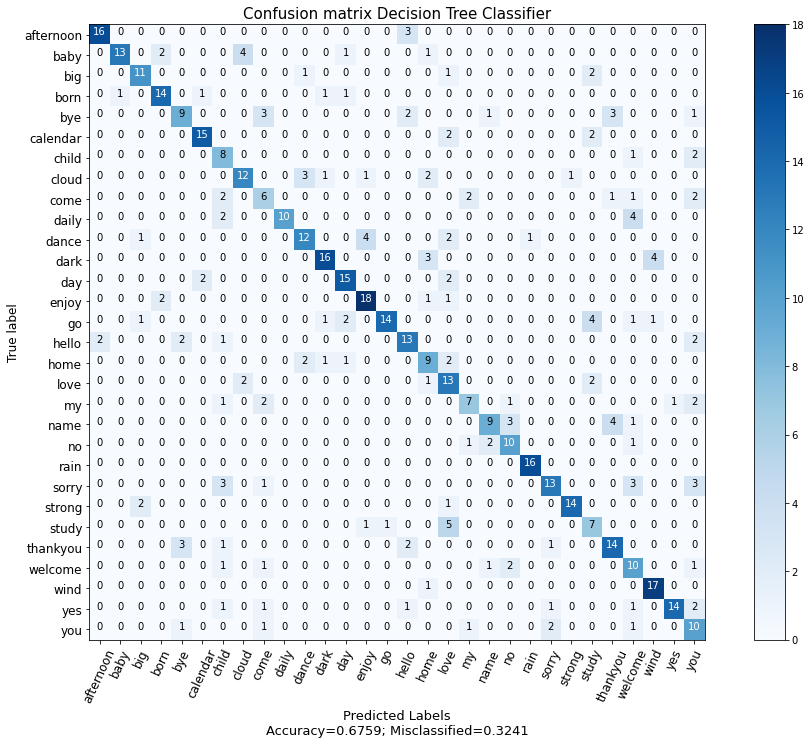

In [15]:
#Decision Tree
dtc_model = DecisionTreeClassifier(max_depth=80)
dtc_model.fit(descriptive_train ,target_train)
predictions = dtc_model.predict(descriptive_test)
plot_performance_results(dtc_model, "Decision Tree Classifier", predictions, target_test, descriptive_train, descriptive_test)

Random Forest Classifier
Accuracy: 0.9204
Macro Precision: 0.9276
Macro Recall: 0.9269
Macro F Score: 0.9196


Confusion Matrix Random Forest Classifier:


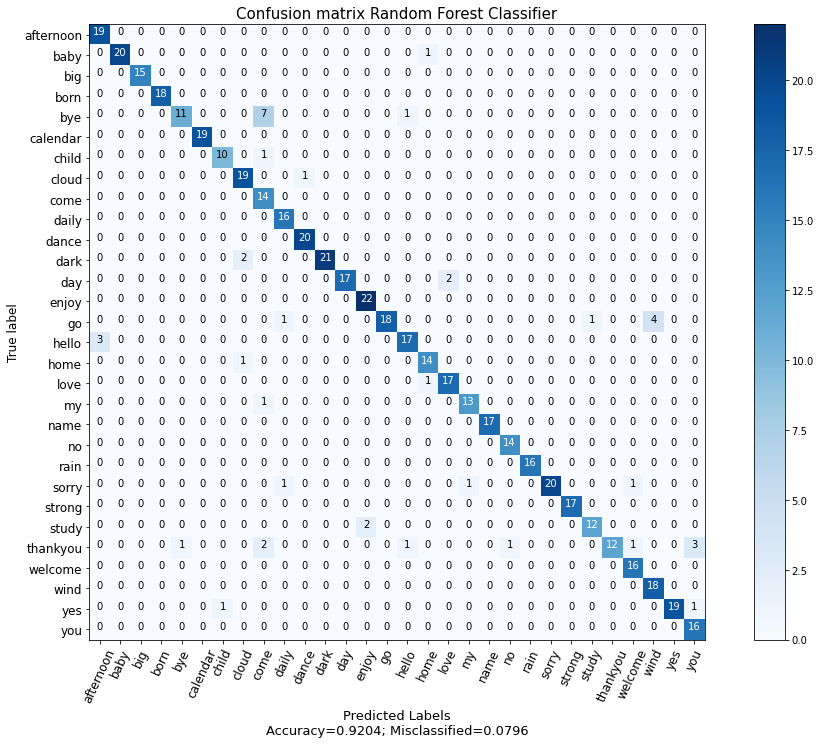

In [8]:
#Random Forest
rfc_model = RandomForestClassifier(n_estimators=250,
                                max_features='auto',
                                bootstrap=True,
                                criterion='gini',
                                n_jobs = 8,
                                random_state = 42)
rfc_model.fit(descriptive_train ,target_train)
predictions = rfc_model.predict(descriptive_test)
plot_performance_results(rfc_model, "Random Forest Classifier", predictions, target_test, descriptive_train, descriptive_test)

Multi-Layer Perceptron
Accuracy: 0.8519
Macro Precision: 0.8538
Macro Recall: 0.8508
Macro F Score: 0.8434


Confusion Matrix Multi-Layer Perceptron:


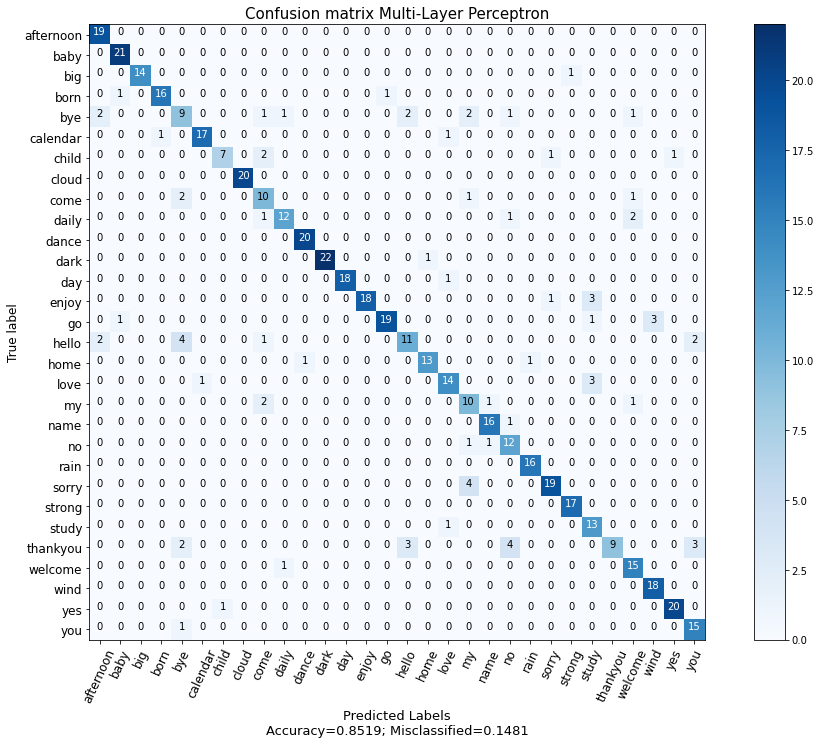

In [31]:
#MLP
mlp_model =  MLPClassifier(max_iter=600, 
                           random_state=10, 
                           solver='adam',
                           learning_rate_init=0.001, 
                           hidden_layer_sizes=(100,),
                           activation='tanh')
mlp_model.fit(descriptive_train ,target_train)
predictions = mlp_model.predict(descriptive_test)
plot_performance_results(mlp_model, "Multi-Layer Perceptron", predictions, target_test, descriptive_train, descriptive_test)

KNN Classifier
Accuracy: 0.7407
Macro Precision: 0.7551
Macro Recall: 0.7401
Macro F Score: 0.7353


Confusion Matrix KNN Classifier:


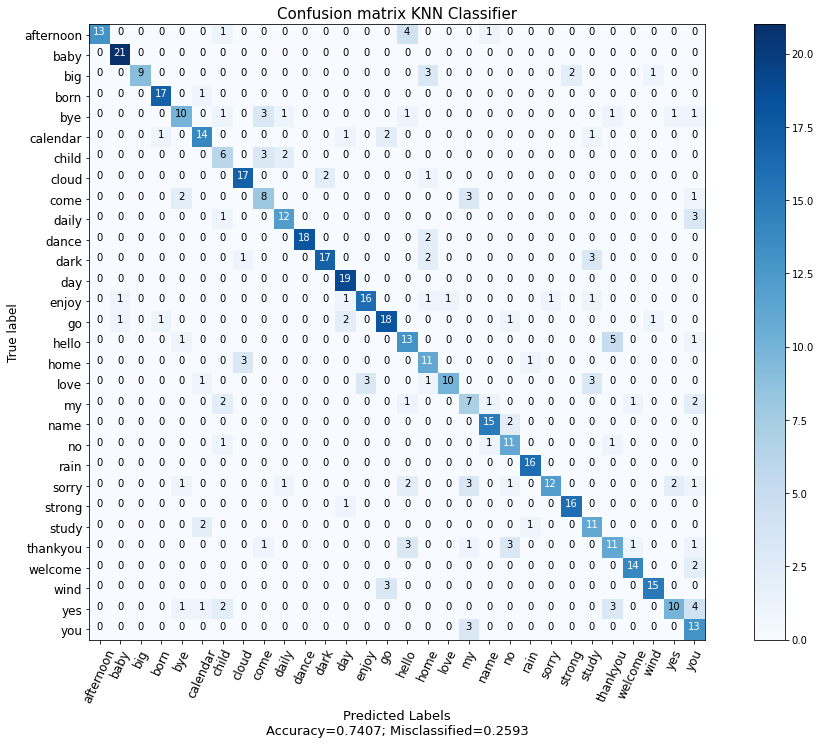

In [15]:
#KNN
knn_model =  KNeighborsClassifier(n_neighbors=1)
knn_model.fit(descriptive_train ,target_train)
predictions = knn_model.predict(descriptive_test)
plot_performance_results(knn_model, "KNN Classifier", predictions, target_test, descriptive_train, descriptive_test)

SVM Classifier
Accuracy: 0.8611
Macro Precision: 0.8636
Macro Recall: 0.8608
Macro F Score: 0.8559


Confusion Matrix SVM Classifier:


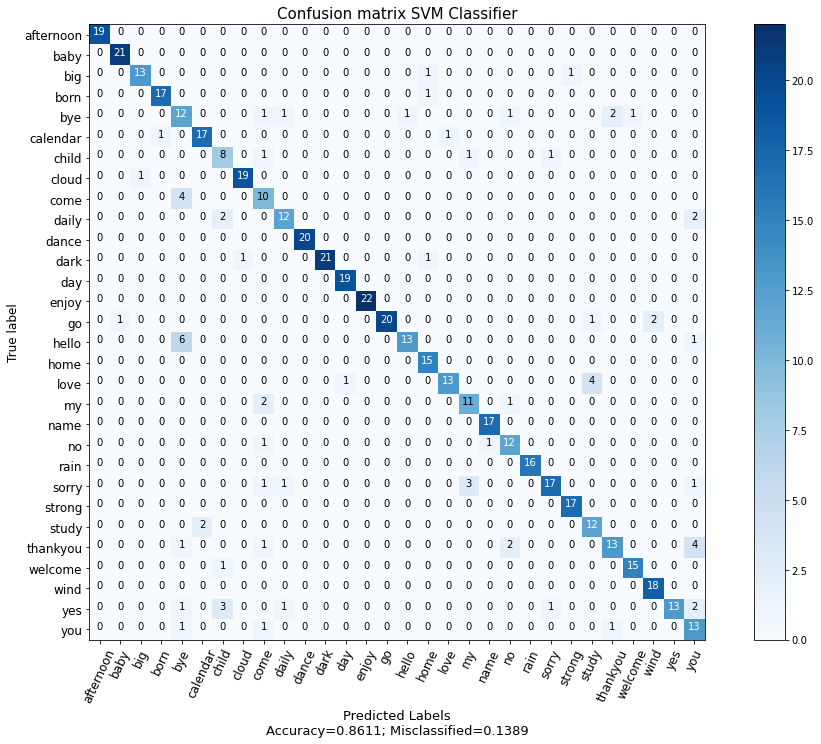

In [19]:
#SVM
svm_model = svm.NuSVC(nu=0.2)
svm_model.fit(descriptive_train ,target_train)
predictions = svm_model.predict(descriptive_test)
plot_performance_results(svm_model, "SVM Classifier", predictions, target_test, descriptive_train, descriptive_test)

Logistic Regression
Accuracy: 0.7426
Macro Precision: 0.7471
Macro Recall: 0.7479
Macro F Score: 0.7323


Confusion Matrix Logistic Regression:


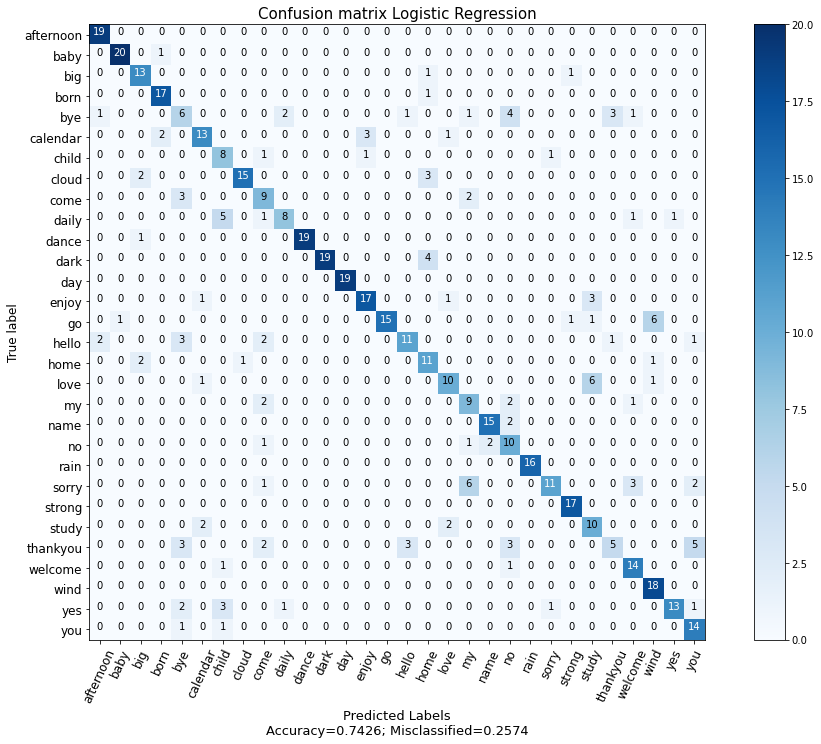

In [13]:
#Linear Regression 
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(descriptive_train ,target_train)
predictions = lr_model.predict(descriptive_test)
plot_performance_results(lr_model, "Logistic Regression", predictions, target_test, descriptive_train, descriptive_test)